# OMSI 2021-22 - TP/TD Int√©gration num√©rique
# Programmation de sommes de Riemann avec Python

## Introduction

Ce TP s'inscrit dans le cadre de l'utilisation des outils num√©rique en OMSI et sert d'introduction
au chapitre 6 du cours. Il consiste √† approximer le calcul d'int√©grales simples par la m√©thode de
Riemann avec comme objectif p√©dagogique d'aider √† mieux comprendre les notions de bornes
d'int√©gration et de balayage d'un domaine. Ces bases seront utiles ensuite pour la r√©solution
des int√©grales multiples. Un autre aspect est d'aborder la probl√©matique de la convergence des
calculs num√©riques.

Ce TP de 2 heures est √† effectuer sur PC en utilisant le langage Python. Les scripts (ou programmes) sont tr√®s simples et ne font pas appel √† un environnement graphique. Des connaissances de base en Python suffisent : d√©finition de variables, affichage d'un r√©sultat, boucles.

## Int√©grale simple en coordonn√©es cart√©siennes : masse d‚Äôune barre inhomog√®ne (premier exemple guid√©)
Une tige m√©tallique de longueur `l` a une section non uniforme, elle est plus √©paisse d'un c√¥t√© que
de l'autre. La masse lin√©ique `Œª` varie en fonction de la distance `x`, par rapport √† une extr√©mit√©
de la tige, selon la loi `Œª = Œª0 + kx¬≤`, o√π `Œª0` et `k` sont des constantes positives.

1. D√©terminer analytiquement la masse `m` de cette tige. Indication : `dm = Œªdx`
1. Application num√©rique : calculer `m` pour `l` = 1,2 m, `Œª0 = 0,625 kg * m‚Åª¬π`, `k = 5,0 *10‚Åª¬≤ kg * m‚Åª¬≥`.
1. Utiliser le script 1 qui donne une approximation de la valeur de m. Diminuer petit √† petit
le pas d'int√©gration dx : commencer par 1e ‚àí 1, par exemple, puis 5e ‚àí 2, 1e ‚àí 2, 1e ‚àí 3...
jusqu'√† 1e ‚àí 6. Dans un logiciel tableur, cr√©er une colonne dx, une colonne m approch√©e,
une colonne m exacte et une colonne dans laquelle vous calculerez l'√©cart relatif en pourcent
entre la valeur approch√©e et la valeur exacte. Tracer l'√©volution de m en fonction du pas
d'int√©gration (utiliser une √©chelle logarithmique pour l'axe des abscisses). Conclusion ?
1. Modifier le script pour utiliser une boucle for

### D√©terminer analytiquement la masse `m` de cette tige. Indication : `dm = Œªdx`

>$m = l*Œª_0 + \frac{k l^3}{3}$

### Application num√©rique : calculer `m` pour `l=1,2 m`, `Œª0=0,625 kg*m‚Åª¬π`, `k=5,0*10‚Åª2kg*m‚Åª¬≥`.

In [1]:
# votre code ici, ins√©rez des cellules au besoin

In [2]:
l = 1.2
lambda0 = 0.625
k = 5*10**-2
m = lambda0 * l + (k*l**3)/3
m

0.7788

### Utiliser le script ci-dessous qui donne une approximation de la valeur de m. 


- Diminuer petit √† petit le pas d'int√©gration dx : commencer par 1e ‚àí 1, par exemple, puis 5e‚àí2, 1e‚àí2, 1e‚àí3‚Ä¶
jusqu'√† 1e-6. 
- Cr√©ez une liste de valeurs pour dx, une liste des valeurs de m approch√©es correspondantes, une liste de valeurs exactes de m aussi longue, et une liste des √©carts entre les valeurs approch√©es et les valeurs exactes. Cr√©ez une DataFrame pandas avec ces 4 listes en colonnes. 
- Tracer l'√©volution de m en fonction du pas d'int√©gration (utiliser une √©chelle logarithmique pour l'axe des abscisses). 
- Conclusion 


In [3]:
#Script 1
longueur = 1.2  # longueur
lambda_0 = 0.625
k = 5.0e-2

m = 0.0  # initialisation du r√©sultat de l‚Äôint√©grale
dx = 1e-1  # pas d‚Äôint√©gration sur x
x = 0.0  # initialisation de la variable x √† la premi√®re borne

while x < longueur:  # tant que x < l on r√©p√®te les instructions suivantes
    m = m + (lambda_0 + k * x**2) * dx  # mise √† jour de m
    x = x + dx  # mise √† jour de x, on l‚Äôaugmente de la valeur du pas

print(" R√©sultat par la m√©thode de Riemann : {0:f} ".format(m))
print(" R√©sultat exact : {0:f} ".format(lambda_0 * l + (k * l**3) / 3))

 R√©sultat par la m√©thode de Riemann : 0.775300 
 R√©sultat exact : 0.778800 


In [4]:
#Script 1
def riemann(dx):
    longueur = 1.2  # longueur
    lambda_0 = 0.625
    k = 5.0e-2

    m = 0.0  # initialisation du r√©sultat de l‚Äôint√©grale
    
    x = 0.0  # initialisation de la variable x √† la premi√®re borne

    while x < longueur:  # tant que x < l on r√©p√®te les instructions suivantes
        m = m + (lambda_0 + k * x**2) * dx  # mise √† jour de m
        x = x + dx  # mise √† jour de x, on l‚Äôaugmente de la valeur du pas

    return m

In [5]:
#¬†refactorisation du script en fonction, pour faire varier dx et obtenir m_approx facilement
def riemann_int(dx):
    longueur = 1.2  # longueur
    lambda_0 = 0.625
    k = 5.0e-2
    m = 0.0  # initialisation du r√©sultat de l‚Äôint√©grale
    x = 0.0  # initialisation de la variable x √† la premi√®re borne

    while x < longueur:  # tant que x < l on r√©p√®te les instructions suivantes
        m += (lambda_0 + k * x**2) * dx  # mise √† jour de m
        x += dx  # mise √† jour de x, on l‚Äôaugmente de la valeur du pas

    return m


In [6]:
riemann_int(dx=0.1)

0.7753

In [7]:
dxs = [1/10**n for n in range(1, 7)] + [5/10**n for n in range(2, 6)] #¬†Valeurs de dx par 2 list¬†comprehensions
dxs.sort(reverse=True) # classement des valeurs de dx , de 10‚Åª¬π √† 10‚Åª‚Å∂
dxs

[0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 5e-05, 1e-05, 1e-06]

In [8]:
m_approx = [riemann_int(dx) for dx in dxs] # list comprehension avec notre fonction

In [9]:
m_exacts = [lambda_0 * l + (k * l**3) / 3] * len(dxs)

In [10]:
ecarts = ["{:.2%}".format((approx - exact)/exact) for approx, exact in zip(m_approx, m_exacts)] 
# list comprehension sur le zip des deux autres listes

In [11]:
import pandas as pd # pour faire un tableau dans le notebook plut√¥t que dans Excel

In [12]:
df = pd.DataFrame() #¬†cr√©ation du DataFrame qui remplacerait le tableau excel
df['dx'] = dxs
df['m_approch√©e'] = m_approx
df['m_exacte'] = m_exacts
df['√©cart relatif'] = ecarts
df['dx'] = df['dx'].apply(lambda x: "{:.1e}".format(x))
df

dx  m_approch√©e  m_exacte √©cart relatif
0  1.0e-01     0.775300    0.7788        -0.45%
1  5.0e-02     0.777025    0.7788        -0.23%
2  1.0e-02     0.778441    0.7788        -0.05%
3  5.0e-03     0.782105    0.7788         0.42%
4  1.0e-03     0.779461    0.7788         0.08%
5  5.0e-04     0.779131    0.7788         0.04%
6  1.0e-04     0.778866    0.7788         0.01%
7  5.0e-05     0.778798    0.7788        -0.00%
8  1.0e-05     0.778807    0.7788         0.00%
9  1.0e-06     0.778801    0.7788         0.00%

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
figure, axes = plt.subplots(figsize=(12,6)) 

plt.plot(df.dx, df.m_approch√©e, label='masse approch√©e')
plt.plot(df.m_exacte, label='masse exacte')
plt.xlabel('dx', labelpad=15)
plt.ylabel('m', rotation=0,labelpad=15)
plt.legend()
plt.show()

Conclusion :¬†la somme de Riemann converge bien vers la valeur exacte, √† condition que les pas soient assez petits.

### Modifier le script pour qu'il utilise une boucle for

In [15]:
#Script 2
longueur = 1.2  # longueur
lambda_0 = 0.625
k = 5.0e-2

m = 0.0  # initialisation du r√©sultat de l‚Äôint√©grale
dx = 1e-1  # pas d‚Äôint√©gration sur x
x = 0.0  # initialisation de la variable x √† la premi√®re borne

num_steps = int(longueur / dx) +1

for _ in range(num_steps):
    m = m + (lambda_0 + k * x**2) * dx  # mise √† jour de m
    x = x + dx  # mise √† jour de x, on l‚Äôaugmente de la valeur du pas

print(" R√©sultat par la m√©thode de Riemann : {0:f} ".format(m))
print(" R√©sultat exact : {0:f} ".format(lambda_0 * l + (k * l**3) / 3))

 R√©sultat par la m√©thode de Riemann : 0.775300 
 R√©sultat exact : 0.778800 


## Int√©grales doubles se ramenant √† des int√©grales simple en coordonn√©es cart√©siennes et polaires (deuxi√®me exemple guid√©)

On propose de calculer l'aire A du domaine D d√©ni par :
D = {(x, y) ‚àà R2 ‚à£ ‚à£ x2 + y2 ‚â§ 4, x ‚â• 0, y ‚â• 0 }

1. Repr√©senter ce domaine. Quel est le r√©sultat attendu ?
1. En choisissant judicieusement la surface √©l√©mentaire, montrer que l'int√©grale permettant de
calculer cette aire devient une int√©grale simple et la r√©soudre analytiquement (un changement
de variable sera n√©cessaire).
1. Utiliser le script 2 et diminuer petit √† petit le pas d'int√©gration dx. Conclusion ?
1. Modifier le script pour utiliser une boucle for
1. R√©√©crire l'int√©grale en utilisant les coordonn√©es polaires. Montrer qu'en choisissant judicieusement la surface √©l√©mentaire, on peut ramener l'int√©grale √† une int√©grale simple et la r√©soudre.
1. √âcrire un autre script, en vous inspirant du premier, pour calculer cette int√©grale.

On propose de calculer l'aire A du domaine D d√©fini par : 
    
    
$\def\R{{\mathbb R}}$
$D =\Bigl\{ (x,y) \in \R^2~\big\vert\ x^{2}+y^{2} \leq 4, x \geq 0, y \geq 0 \Bigr\}$


### Repr√©senter ce domaine. Quel est le r√©sultat attendu ?

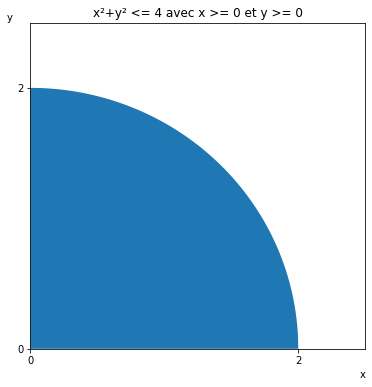

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

figure, ax = plt.subplots(figsize=(6,6)) 
x = np.linspace(0, 2, 1000)
y = np.sqrt(4-x**2)

ax.fill_between(x,y) # remplit l'aire entre l'axe des abscisses et la courbe

# param√©trage du plot
## taille des bornes
plt.xlim(0,2.5)
plt.ylim(0, 2.5)
##¬†labels des axes
plt.xlabel('x', loc='right')
plt.ylabel('y', loc='top', rotation=0)
## r√©duction du nombre de ticks
plt.locator_params(axis='x', nbins=2)
plt.locator_params(axis='y', nbins=2)
## titre
plt.title( 'x¬≤+y¬≤ <= 4 avec x >= 0 et y >= 0')
## lets's go
plt.show()

Il s'agit d'un quart de cercle de rayon 2 situ√© dans le premier quadrant. $A = \pi$

### En choisissant judicieusement la surface √©l√©mentaire, montrer que l'int√©grale permettant de calculer cette aire devient une int√©grale simple et la r√©soudre analytiquement (un changement de variable sera n√©cessaire).

En cart√©sien, $\mathrm{d}A = \mathrm{d}x \mathrm{d}y$ mais on peut prendre une surface √©l√©mentaire plus grande  : $\mathrm{d}A = y \mathrm{d}x = \sqrt{4 - x^{2}} \mathrm{d}x$ (ce qui revient pour une int√©grale double √† calculer la premi√®re int√©grale sur $y$ entre $0$ et $\sqrt{4 - x^{2}}$).

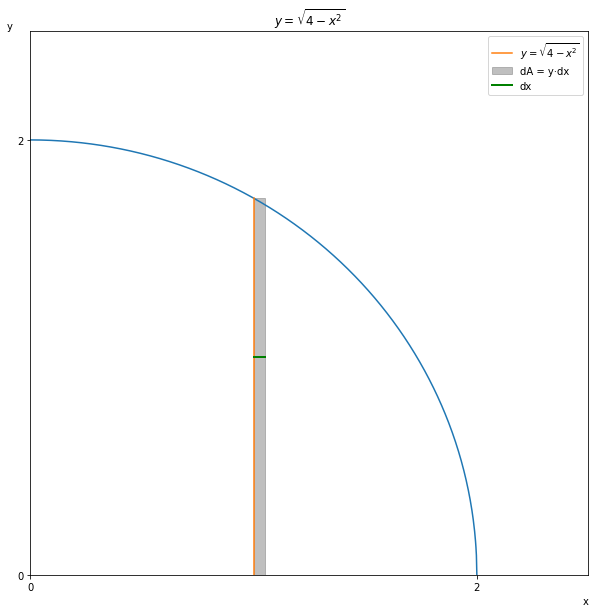

In [17]:
figure, ax = plt.subplots(figsize=(10, 10))

# plot de l'arc de cercle
x = np.linspace(0, 2, 1000)
y = np.sqrt(4 - x**2)
plt.plot(x, y)

# plot y1
y1 = np.sqrt(4 - 1**2)
plt.plot((1, 1), (0, y1), label='$y= \sqrt{4 - x^{2}} $')


# Rectangle dx * y
xy = (1, 0)
dx = 0.05
rect = patches.Rectangle(xy,
                         width=dx,
                         height=y1,
                         linewidth=1,
                         edgecolor='gray',
                         facecolor='gray',
                         alpha=.5,
                         label='dA = y¬∑dx')
ax.add_patch(rect)

# plot dx
plt.plot((1, 1+dx),(1,1), label="dx", linewidth=2, color='green')

# param√©trage du plot
## taille des bornes
plt.xlim(0,2.5)
plt.ylim(0, 2.5)
## labels des axes
plt.xlabel('x', loc='right')
plt.ylabel('y', loc='top', rotation=0)
## r√©duction du nombre de ticks
plt.locator_params(axis='x', nbins=2)
plt.locator_params(axis='y', nbins=2)
## titre
plt.title('$y= \sqrt{4 - x^{2}} $')
# l√©gende
plt.legend()
## lets's go
plt.show()

\begin{equation}
A = \displaystyle\int_{0}^{2}{\sqrt{4 - x^{2}} \mathrm{d}x} = \displaystyle\int_{0}^{2}{2 \sqrt{1 - \left( \frac{x}{2} \right)^{2}} \mathrm{d}x}
\end{equation}

On pose par exemple $\displaystyle\frac{x}{2} = \sin \alpha \Rightarrow \mathrm{d}x = 2 \cos \alpha \mathrm{d}\alpha$

Et pour calculer les nouvelles bornes on utilise : $\alpha = \arcsin{\displaystyle\frac{x}{2}}$

\begin{equation}
\begin{split}
A & = \displaystyle 4 \int_{0}^{\frac{\pi}{2}}{\sqrt{1 - \sin^{2} \alpha} \cos \alpha \mathrm{d}\alpha} = \displaystyle 4 \int_{0}^{\frac{\pi}{2}}{ \cos^{2} \alpha \mathrm{d}\alpha} = \displaystyle 2 \int_{0}^{\frac{\pi}{2}}{ \left( 1 + \cos 2\alpha \right) \mathrm{d}\alpha}\\
& = 2 \bigg[ \alpha + \frac{1}{2} \sin 2\alpha \bigg]_{0}^{\frac{\pi}{2}} = 2 \left( \frac{\pi}{2} - 0\right) = \pi
\end{split}
\end{equation}

### Utiliser le script ci-dessous et diminuer petit √† petit le pas d'int√©gration dx. Conclusion ?

In [18]:
# Aire d'un quart de disque de rayon 2 : int√©grale simple en cart√©sien
from math import pi, sqrt

A = 0.0 # initialisation du r√©sultat de l'int√©grale
dx = 1e-1 # pas d'int√©gration sur x
x = 0.0 # initialisation de la variable x √† la premi√®re borne

while x < 2: # tant que x est inf√©rieur √† 2, on r√©p√®te le bloc indent√© ci-dessous
    A = A + sqrt(4-x**2)*dx # mise √† jour de A
    x = x + dx # mise √† jour de x, on l'augmente de la valeur du pas
    
print('R√©sultat par la m√©thode de Riemann : {0:f}'.format(A))
print('R√©sultat par un calcul analytique (pi) : {0:f}'.format(pi))

R√©sultat par la m√©thode de Riemann : 3.228465
R√©sultat par un calcul analytique (pi) : 3.141593


In [19]:
# refactorisation du script en fonction de dx
def riemann_quarter_circle(dx):
    A = 0.0 # initialisation du r√©sultat de l'int√©grale
    x = 0.0 # initialisation de la variable x √† la premi√®re borne

    while x < 2: # tant que x est inf√©rieur √† 2, on r√©p√®te le bloc indent√© ci-dessous
        A = A + sqrt(4-x**2)*dx # mise √† jour de A
        x = x + dx # mise √† jour de x, on l'augmente de la valeur du pas

    return A

riemann_quarter_circle(dx=0.1) # test de la fonction

dxs = [10**-i for i in range(1,7)] # liste de valeurs de dx, entre 10‚Åª1 et 10‚Åª6

df = pd.DataFrame() # cr√©ation d'une DataFrame pandas pour stocker et montrer les r√©sultats
df['dx'] = dxs #¬†colonne dx

df['A_approch√©e'] = [riemann_quarter_circle(dx) for dx in dxs] # Colonne des valeurs approch√©es, via notre fonction
df['A_r√©elle']= [np.pi] * len(dxs) # colonne avec la valeur r√©elle
df['√âcarts relatifs'] = (df['A_approch√©e'] - df['A_r√©elle']) / df['A_r√©elle'] #¬†colonne des √©carts
df['dx'] = df['dx'].apply(lambda x: "{:.0e}".format(x)) # formatage en notation scientifique de la colonne dx
df['√âcarts relatifs'] = df['√âcarts relatifs'].apply(lambda x: "{:.2e}".format(x)) # idem pour colonne √©carts
df

dx  A_approch√©e  A_r√©elle √âcarts relatifs
0  1e-01     3.228465  3.141593        2.77e-02
1  1e-02     3.151177  3.141593        3.05e-03
2  1e-03     3.142580  3.141593        3.14e-04
3  1e-04     3.141692  3.141593        3.17e-05
4  1e-05     3.141603  3.141593        3.18e-06
5  1e-06     3.141594  3.141593        3.18e-07

In [20]:
figure, ax = plt.subplots(figsize=(16, 8))

ax.plot(df.dx, df.A_approch√©e, label='Aire approch√©e')
ax.plot(df.dx, [np.pi]*len(df.dx), label='Aire exacte = œÄ')
ax.xscale='log'


#plt.title('$y= \sqrt{4 - x^{2}} $')
plt.xlabel('Taille du pas d‚Äôint√©gration')
plt.ylabel('Aire', rotation=0)

plt.legend()
plt.show()



> Conclusion :¬†La m√©thode de Riemann converge bien vers la vraie valeur, √† mesure que la taille du pas diminue.

### Modifier le script pour utiliser une boucle for

In [21]:
# Aire d'un quart de disque de rayon 2 : int√©grale simple en cart√©sien
from math import pi, sqrt

A = 0.0 # initialisation du r√©sultat de l'int√©grale
dx = 1e-1 # pas d'int√©gration sur x
x = 0.0 # initialisation de la variable x √† la premi√®re borne

for indice in range(0, round(2/dx)): # boucle de 0 √† indice max-1 par pas de 1
    A = A + sqrt(4-x**2)*dx # mise √† jour de A
    x = x + dx # mise √† jour de x, on l'augmente de la valeur du pas
    
print('R√©sultat par la m√©thode de Riemann : {0:f}'.format(A))
print('R√©sultat par un calcul analytique (pi) : {0:f}'.format(pi))

R√©sultat par la m√©thode de Riemann : 3.228465
R√©sultat par un calcul analytique (pi) : 3.141593


### R√©√©crire l'int√©grale en utilisant les coordonn√©es polaires. Montrer qu'en choisissant judicieusement la surface √©l√©mentaire, on peut ramener l'int√©grale √† une int√©grale simple et la r√©soudre.

En polaire on a $\mathrm{d}A = r\mathrm{d}r\mathrm{d}\theta$. On peut consid√©rer un $\mathrm{d}A$ plus grand repr√©sent√© ci-dessous 

$\mathrm{d}A = \displaystyle\frac{\pi}{2}r\mathrm{d}r$

\begin{equation}
A = \displaystyle\frac{\pi}{2}\displaystyle\int_{0}^{2}{r\mathrm{d}r} = \frac{\pi}{4} \bigg[ r^{2} \bigg]_{0}^{2} = \piùëüdùëü
\end{equation}

In [22]:
figure, ax = plt.subplots(figsize=(6, 6))

# plot de l'arc de cercle principal
x = np.linspace(0, 2, 1000)
y = np.sqrt(4 - x**2)
plt.plot(x, y)


# Plot des deux arcs de cercle repr√©sentant dr ( en r√©alit√© 2¬†cercles superpos√©s de rayon 1+dr (gris) et 1 (blanc))
dr = 0.08
inner_arc = patches.Circle((0,0), radius=1, color='white')
outer_arc = patches.Circle((0,0), radius=1+dr, color='#BBB', label='dA = œÄ/2¬∑rdr')
ax.add_patch(outer_arc)
ax.add_patch(inner_arc)


# param√©trage du plot
## taille des bornes
plt.xlim(0,2.5)
plt.ylim(0, 2.5)
## labels des axes
plt.xlabel('x', loc='right')
plt.ylabel('y', loc='top', rotation=0)
## r√©duction du nombre de ticks
plt.locator_params(axis='x', nbins=2)
plt.locator_params(axis='y', nbins=2)

# l√©gende
plt.legend()
## lets's go
plt.show()

### √âcrire un autre script, en vous inspirant du premier, pour calculer cette int√©grale.

In [23]:
A = 0  #¬†initialisation de l'aire √† 0
dr = 1e-1  #¬†pas d'int√©gration
r = 0  # initialisation de r √† la premi√®re borne
while r < 2:  # tant que r est inf√©rieur √† la borne de fin, on r√©p√®te le bloc indent√©
    A += (np.pi / 2) * r * dr  # On incr√©mente l'aire de œÄ/2¬∑rdr
    r += dr  #¬†on incr√©mente r du pas d'int√©gration
print('R√©sultat par la m√©thode de Riemann: {0:f}'.format(A))
print('R√©sultat par la m√©thode de Riemann: {0:f}'.format(np.pi))

R√©sultat par la m√©thode de Riemann: 2.984513
R√©sultat par la m√©thode de Riemann: 3.141593


## Extension au cas des int√©grales multiples

Reprendre l'exemple pr√©c√©dent du calcul de l'aire d'un quart de disque mais √©crire cette fois le
calcul de l'aire sous la forme d'une int√©grale double, en cart√©sien et en polaire. Puis √©crire les
scripts correspondant. Indication : il faut √©crire deux boucles imbriqu√©es en faisant attention √†
l'initialisation des variables.

### Surface calcul√©e par une int√©grale double en coordonn√©es cart√©siennes (√† r√©diger)

### Surface calcul√©e par une int√©grale double en coordonn√©es polaires

![img](quart_disque_intregration_double.png)

$S = \displaystyle\frac{\pi}{4} \approx 0,785398163$ 

$\mathrm{d}S = r \mathrm{d}r \mathrm{d}\theta$ en coordonn√©es polaires.

$S = \displaystyle\int_{0}^{1}\int_{0}^{\frac{\pi}{2}} {\mathrm{d}\theta r \mathrm{d}r } = \int_{0}^{\frac{\pi}{2}}\displaystyle\int_{0}^{1} {r \mathrm{d}r \mathrm{d}\theta} = \int_{0}^{\frac{\pi}{2}} {\mathrm{d}\theta} \displaystyle\int_{0}^{1} {r \mathrm{d}r }$.

Peut-on inverser l'ordre d'int√©gration ? Oui car les variables sont s√©par√©es

Peut-on s√©parer l'int√©grale double en un produit de deux int√©grales simples ? Oui pour la m√™me raison.

R√©solution : $S =\displaystyle\frac{\pi}{2} \int_{0}^{1} {r \mathrm{d}r} = \displaystyle\frac{\pi}{4} \left[ r^{2} \right]_{0}^{1} = \displaystyle\frac{\pi}{4}$


In [24]:
# script Python double int√©grale avec 2 boucles imbriqu√©es
from math import pi, sin, cos
S1 = 0
S2 = 0
dr = 1e-3
dt = 1e-3

# Premier calcul par le produit des deux int√©grales
r = 0
while r < 1:
    S1 += r*dr #¬†mise √† jour de S1
    r += dr #¬†incr√©mentation de r par le pas

t = 0
while t < pi/2:
    S2 += dt # mise √† jour de S2
    t += dt # mise √† jour de t
    
#¬†Second calcul par boucles imbriqu√©es

S = 0
r = 0

while r < 1:
    t = 0 # initialisation de t √† la premi√®re borne
    while t < pi/2:
        S += r*dr*dt # mise √† jour de S
        t += dt # on incr√©mente t de la valeur du pas
    r += dr # incr√©mentation de r par la valeur de son pas
    
print('R√©sultat par le produit des deux int√©grales¬†: {0:f}'.format(S1*S2))
print('R√©sultat int√©grale double : {0:f}'.format(S))
print('R√©sultat par le calcul analytique œÄ/4 : {0:f}'.format(pi/4))

      

R√©sultat par le produit des deux int√©grales¬†: 0.784714
R√©sultat int√©grale double : 0.784714
R√©sultat par le calcul analytique œÄ/4 : 0.785398


Influence des pas d'int√©gration : comme pr√©visible, plus les pas sont petits et meilleure est
la convergence vers la solution exacte. Mais attention au temps de calcul ! Avec 1E ‚àí 5 √ßa
prend d√©j√† plusieurs secondes pour les deux boucles imbriqu√©es.

## Int√©grale double quelconque √† variables li√©es en coordonn√©es cart√©siennes

Dans le plan $\mathbb{R}^{2}$ muni d'un rep√®re orthonorm√©, on consid√®re le domaine $D$ d√©fini par

 $D = \left\{ (x, y) \in \mathbb{R}^{2} / -2 \leq y \leq 2, \displaystyle\frac{1}{2}y - 1 \leq x \leq y^{2}\right\}$



### Dessiner ce domaine et calculer son aire. Peut-on inverser l'ordre d'int√©gration ? Peut-on s√©parer l'int√©grale double en un produit de deux int√©grales simples ?

\begin{equation*}
\begin{split}
S & = \displaystyle\int_{-2}^{2}\int_{\frac{1}{2}y-1}^{y^{2}} {\mathrm{d}x \mathrm{d}y}\\
& = \displaystyle\int_{-2}^{2} \left( y^{2} - \frac{1}{2}y + 1 \right)\mathrm{d}y\\
& = \displaystyle \bigg[ \displaystyle\frac{y^{3}}{3} - \frac{y^{2}}{4} + y \bigg]_{-2}^{2} = \frac{28}{3}\\
\end{split}
\end{equation*}

Oui on peut inverser l'ordre d'int√©gration mais c'est plus dur car il faut couper l'int√©grale en plusieurs parties :

$S = \displaystyle\int_{-2}^{0}\int_{-2}^{2x+2} {\mathrm{d}y \mathrm{d}x} + \displaystyle\int_{0}^{4}\int_{-2}^{-\sqrt{x}} {\mathrm{d}y \mathrm{d}x} + \displaystyle\int_{0}^{4}\int_{\sqrt{x}}^{2} {\mathrm{d}y \mathrm{d}x}$


Et on ne peut pas s√©parer l'int√©grale en un produit de deux int√©grales simples car les variables
sont li√©es.

![](fig_exercice_32.jpg)

### √âcrire un script Python permettant d'approximer $S$.

In [25]:
S = 0 #¬†initialisation du r√©sultat
dx = 1e-3 # on ne peut pas prendre plus petit, le temps de calcul exploserait
dy = 1e-3

y = -2 # initialisation de y √† sa premi√®re borne

while y < 2:
    x = 0.5*y-1 # initialisation de x √† sa premi√®re borne
    while x < y**2: #¬†tant que x est inf√©rieur √† y¬≤ on r√©p√®te le bloc indent√© suivant
        S += dx*dy # mise √† jour de S
        x += dx # mise √† jour de x, incr√©ment√© par son pas
    y += dy # mise √† jour de y, incr√©ment√© de son pas
    
print('R√©sultat par int√©grale double :¬†{0:f}'.format(S))
print('R√©sultat par calcul analytique (28/3)¬†: {0:f}'.format(28/3))

R√©sultat par int√©grale double :¬†9.340319
R√©sultat par calcul analytique (28/3)¬†: 9.333333


### Soit $f:D \rightarrow \mathbb{R}$ d√©finie par $f(x,y) = x+y$. Soit l'int√©grale $I = \displaystyle\iint_{D} {f(x,y) \mathrm{d}x\mathrm{d}y}$.

Calculer $I$.

\begin{equation*}
\begin{split}
I & = \displaystyle\int_{-2}^{2}\int_{\frac{1}{2}y-1}^{y^{2}} {(x+y) \mathrm{d}x\mathrm{d}y}\\
& = \displaystyle\int_{-2}^{2} \bigg[ \displaystyle\frac{x^{2}}{2} +yx \bigg]_{\frac{1}{2}y-1}^{y^{2}}\mathrm{d}y\\
& = \displaystyle\int_{-2}^{2} \left( \displaystyle\frac{y^{4}}{2} + y^{3} -  \frac{1}{2} \left( \frac{1}{2}y-1 \right)^{2}- \frac{1}{2}y^{2}+y \right) \mathrm{d}y\\
& = \displaystyle\int_{-2}^{2} \left( \displaystyle\frac{y^{4}}{2} + y^{3} - \frac{5}{8}y^{2} + \frac{1}{2}y -  \frac{1}{2} \right) \mathrm{d}y\\
& = \displaystyle \bigg[ \displaystyle\frac{y^{5}}{10} + \frac{y^{4}}{4} - \frac{5}{24}y^{3} + \frac{1}{4}y^{2} -  \frac{1}{2}y \bigg]_{-2}^{2} = \frac{16}{15} \approx 1,066666667\\
\end{split}
\end{equation*}

### Retrouver ce r√©sultat √† l'aide d'un script *Python*

In [26]:
I = 0 # initialisation du r√©sultat
dx = 1e-3 # on ne peut pas prendre plus petit, le temps de calcul exploserait
dy = 1e-3

y = -2 # initialisation de y √† sa premi√®re borne

while y < 2:
    x = 0.5*y-1 # initialisation de x √† sa premi√®re borne
    while x < y**2: # tant que x est inf√©rieur √† y¬≤ on r√©p√®te le bloc indent√© suivant
        I += (x+y)*dx*dy # mise √† jour de I
        x += dx # mise √† jour de x, incr√©ment√© par son pas
    y += dy # mise √† jour de y, incr√©ment√© de son pas
    
print('R√©sultat par int√©grale double : {0:f}'.format(I))
print('R√©sultat par calcul analytique (16/15) : {0:f}'.format(16/15))

R√©sultat par int√©grale double : 1.069626
R√©sultat par calcul analytique (16/15) : 1.066667
